# Config

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df  = pd.read_csv('https://raw.githubusercontent.com/astromar2187/CienciadeDados1/refs/heads/main/all_artists.csv')
df = pd.read_csv("df_final.csv")

In [43]:
df.info()

# df['tags'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3226 entries, 0 to 3225
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   artist        3226 non-null   object 
 1   title         3226 non-null   object 
 2   album         3226 non-null   object 
 3   year          3226 non-null   int64  
 4   lyrics        3210 non-null   object 
 5   tags          0 non-null      float64
 6   record_label  48 non-null     object 
 7   estado        3226 non-null   object 
 8   regiao        3226 non-null   object 
 9   decade        3226 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 252.2+ KB


In [5]:
# print all different artists (column "artist")
print(df['tags'].unique())

["['Hip Hop', 'Rap', 'Gospel/Religioso']"
 "['Rap', 'Hip Hop', 'Gospel/Religioso']" "['Rap', 'Hip Hop']"
 "['Black Music', 'Reggae', 'Hip Hop']" "['Hip Hop', 'Romântico', 'Rap']"
 "['Pop/Rock', 'Rap', 'Rock']" "['Rap']" "['Rap', 'Hip Hop', 'MPB']"
 "['Hip Hop', 'Rap']" "['Hip Hop', 'Rap', 'Samba']"
 "['R&B', 'Rap', 'Hip Hop']" "['Funk Carioca', 'Rap', 'Funk']"
 "['Reggae', 'Rap', 'Rock']" "['Hip Hop', 'Rap', 'Romântico']"
 "['Hip Hop', 'Rap', 'Black Music']" "['Rap', 'Reggae']"]


# Estatísticas descritivas

### Análise dos Anos ✅

Média dos anos: 2013.3325740318908
Mediana dos anos: 2016.0
Moda dos anos: [2017]
Mínimo: 1990
Máximo: 2024
Estatísticas sobre número de músicas por álbum:
Média de músicas por álbum: 7.30
Mediana de músicas por álbum: 7.00
Mínimo de músicas por álbum: 1 (Álbum: '03:00', Artista: 'matue', Ano: 2018)
Máximo de músicas por álbum: 26 (Álbum: '10 anos de triunfo (ao vivo)', Artista: 'emicida', Ano: 2018)


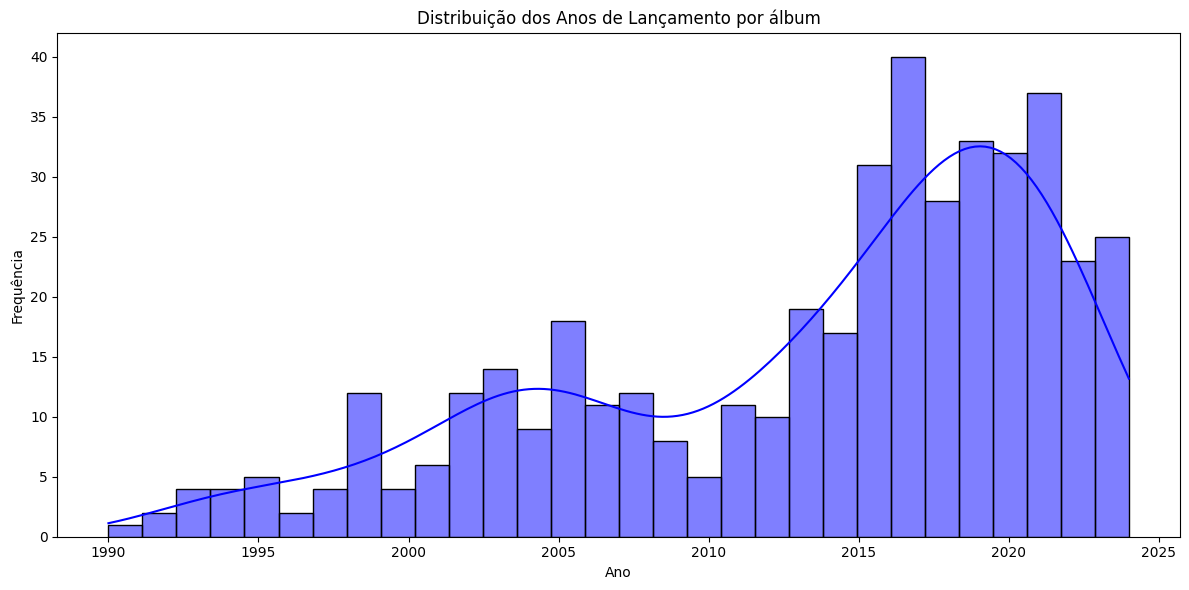

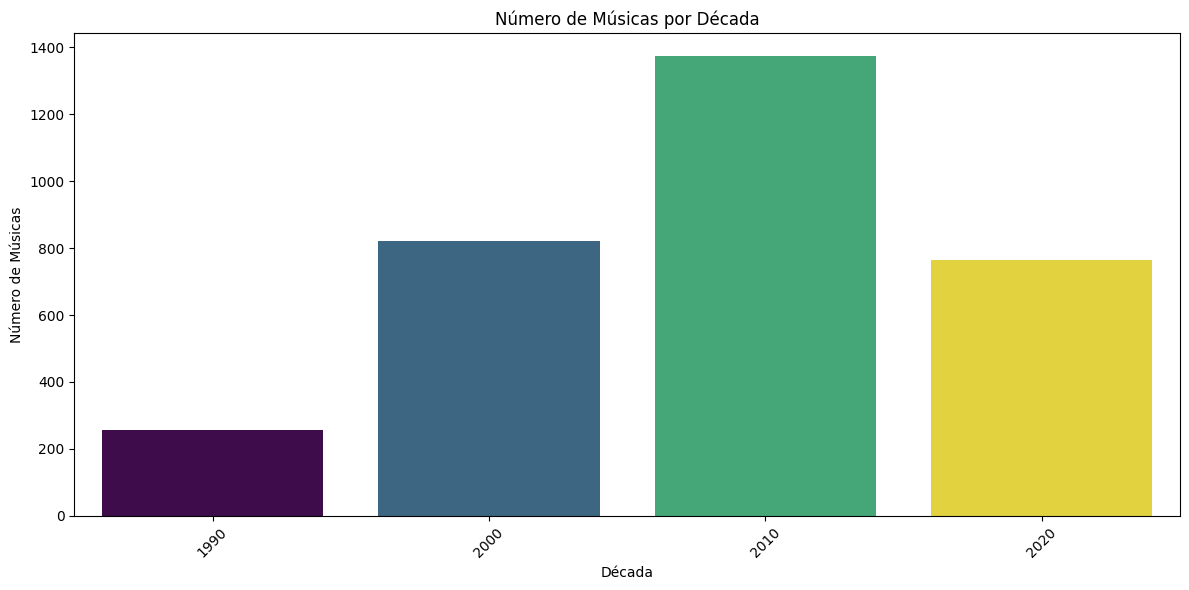

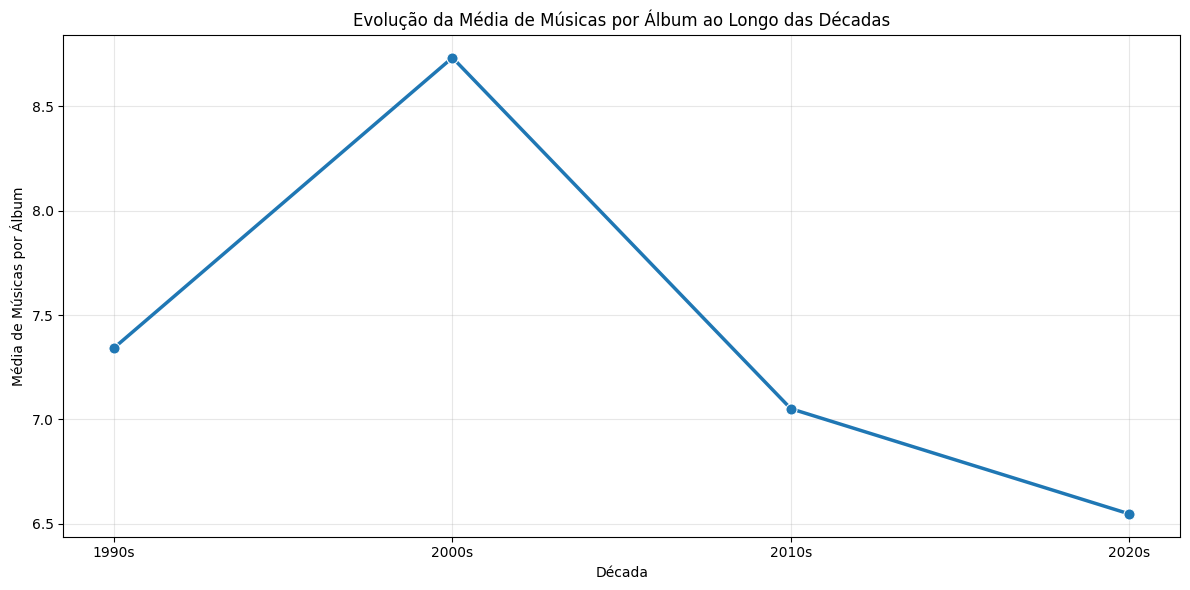

In [18]:
# Filtrar anos diferentes de zero e agrupar por álbum para considerar apenas um registro por álbum
df_valid_years = df[df['year'] != 0].drop_duplicates(subset=['album'])

# média, mediana e moda dos anos de lançamento (coluna "year" do df), desconsiderando anos = 0
print("Média dos anos:", df_valid_years['year'].mean())
print("Mediana dos anos:", df_valid_years['year'].median())
print("Moda dos anos:", df_valid_years['year'].mode().values)
# valor mínimo e máximo
print("Mínimo:", df_valid_years['year'].min())
print("Máximo:", df_valid_years['year'].max())

# gráfico de distribuição dos anos de lançamento
plt.figure(figsize=(12, 6))
sns.histplot(df_valid_years['year'], bins=30, kde=True, color='blue')
plt.title('Distribuição dos Anos de Lançamento por álbum')
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.tight_layout()
plt.savefig('distribuicao_anos_lancamento.png')
# plt.show()

df_valid_years = df[df['year'] != 0].copy()

# contagem de músicas por década ou por ano (histograma ou gráfico de linha)
df_valid_years['decade'] = (df_valid_years['year'] // 10) * 10
decade_counts = df_valid_years['decade'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    x=decade_counts.index, 
    y=decade_counts.values, 
    hue=decade_counts.index, 
    palette='viridis', 
    legend=False
)
plt.title('Número de Músicas por Década')
plt.xlabel('Década')
plt.ylabel('Número de Músicas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('musicas_por_decada.png')
# plt.show()

# Calcular o número de músicas por álbum
songs_per_album = df_valid_years.groupby(['album', 'year']).size().reset_index(name='num_songs')

# Estatísticas básicas sobre músicas por álbum
print("Estatísticas sobre número de músicas por álbum:")
print(f"Média de músicas por álbum: {songs_per_album['num_songs'].mean():.2f}")
print(f"Mediana de músicas por álbum: {songs_per_album['num_songs'].median():.2f}")
# Mínimo de músicas por álbum
min_songs = songs_per_album['num_songs'].min()
min_album_row = songs_per_album[songs_per_album['num_songs'] == min_songs].iloc[0]
min_album_name = min_album_row['album']
min_album_year = min_album_row['year']
min_album_artist = df_valid_years[df_valid_years['album'] == min_album_name]['artist'].iloc[0]
print(f"Mínimo de músicas por álbum: {min_songs} (Álbum: '{min_album_name}', Artista: '{min_album_artist}', Ano: {min_album_year})")

# Máximo de músicas por álbum
max_songs = songs_per_album['num_songs'].max()
max_album_row = songs_per_album[songs_per_album['num_songs'] == max_songs].iloc[0]
max_album_name = max_album_row['album']
max_album_year = max_album_row['year']
max_album_artist = df_valid_years[df_valid_years['album'] == max_album_name]['artist'].iloc[0]
print(f"Máximo de músicas por álbum: {max_songs} (Álbum: '{max_album_name}', Artista: '{max_album_artist}', Ano: {max_album_year})")
# Criar décadas
songs_per_album['decade'] = (songs_per_album['year'] // 10) * 10
# Média de músicas por álbum por década
avg_songs_per_decade = songs_per_album.groupby('decade')['num_songs'].mean().reset_index()

# Gráfico: Evolução da média de músicas por álbum ao longo das décadas
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=avg_songs_per_decade, 
    x='decade', 
    y='num_songs', 
    marker='o', 
    linewidth=2.5, 
    markersize=8
)
plt.title('Evolução da Média de Músicas por Álbum ao Longo das Décadas')
plt.xlabel('Década')
plt.ylabel('Média de Músicas por Álbum')
plt.grid(True, alpha=0.3)
plt.xticks(avg_songs_per_decade['decade'], [f"{int(d)}s" for d in avg_songs_per_decade['decade']])
plt.tight_layout()
plt.savefig('evolucao_musicas_por_album_decadas.png')
# plt.show()

# print("\nMédia de músicas por álbum por década:")
# for _, row in avg_songs_per_decade.iterrows():
#     print(f"{int(row['decade'])}s: {row['num_songs']:.2f} músicas por álbum")

### Análise dos Artistas ✅

Quantidade total de artistas: 78
Média de músicas por artista: 41.36
Média de álbuns por artista: 5.68
Quantidade de artistas de rap brasileiros retornados pelo vagalume: 78


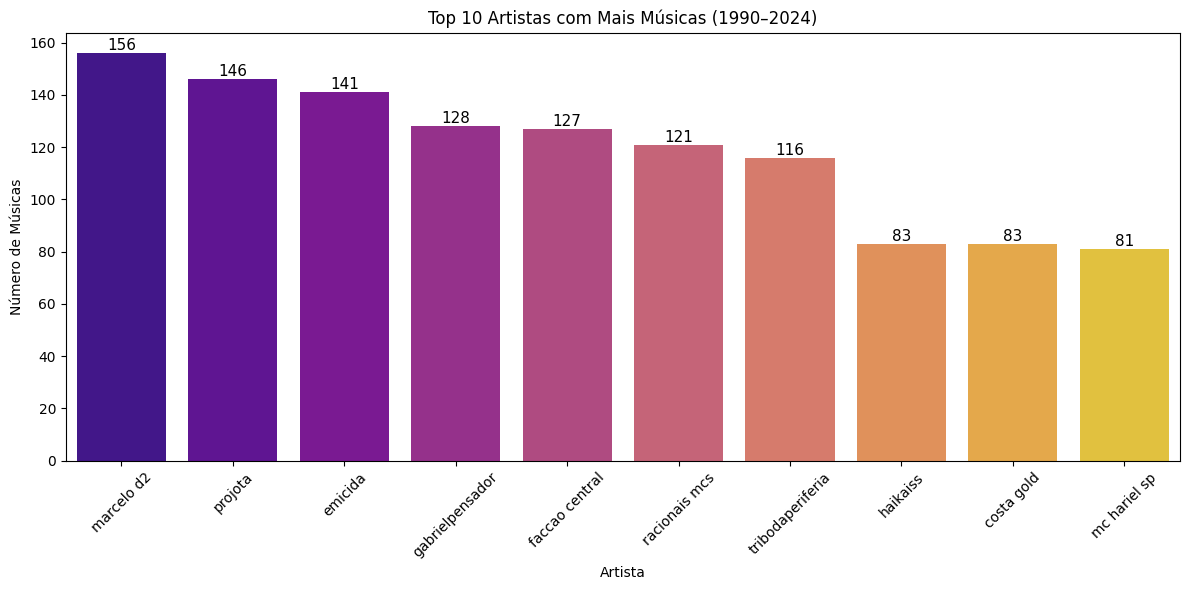

In [31]:
# quantidade total de artistas únicos
total_artists = df['artist'].nunique()
print(f"Quantidade total de artistas: {total_artists}")

# Média de músicas por artista
mean_songs_per_artist = df.groupby('artist').size().mean()
print("Média de músicas por artista: {:.2f}".format(mean_songs_per_artist))

# média de álbuns por artista
mean_albums_per_artist = df.groupby('artist')['album'].nunique().mean()
print("Média de álbuns por artista: {:.2f}".format(mean_albums_per_artist))

# imprimir quantidade de artistas únicos na base
unique_artists_count = df['artist'].nunique()
print("Quantidade de artistas de rap brasileiros retornados pelo vagalume:", unique_artists_count)

# Gráfico de barras com a média de músicas por artista
artist_song_counts = df['artist'].value_counts().head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=artist_song_counts.index, 
    y=artist_song_counts.values, 
    hue=artist_song_counts.index, 
    palette='plasma', 
    legend=False
)
plt.title(f"Top 10 Artistas com Mais Músicas ({df[df['year'] != 0]['year'].min()}–{df['year'].max()})")
plt.xlabel('Artista')
plt.ylabel('Número de Músicas')
plt.xticks(rotation=45)
# Adicionar frequência no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=11)
plt.tight_layout()
plt.savefig('top_10_artistas_musicas.png')
plt.show()

### Análise das Tags ✅

Top 10 tags mais comuns:
tags
Rap                 2133
Hip Hop             1368
Rock                 347
Reggae               202
Pop/Rock             201
Gospel/Religioso     133
Samba                106
Romântico            104
Black Music           99
MPB                   60
Name: count, dtype: int64


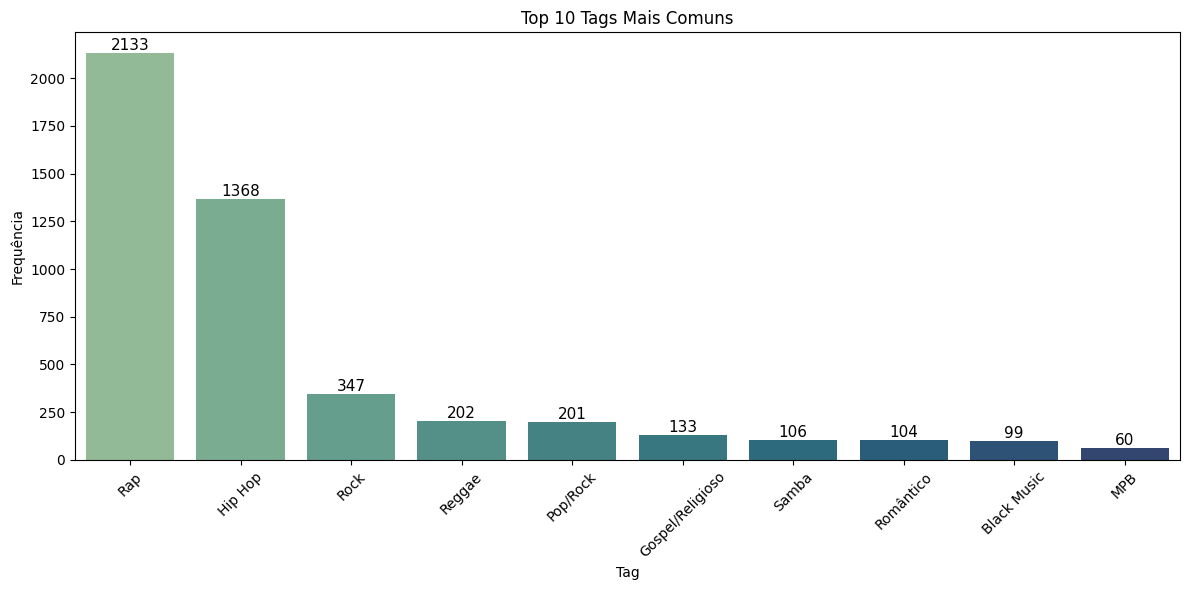

In [9]:
import re

# frequência das tags mais comuns
# Extrair tags individuais removendo colchetes e aspas
def clean_and_split_tags(tag_str):
    # Remove colchetes e aspas simples/duplas, depois separa por vírgula
    if pd.isna(tag_str):
        return []
    return [t.strip() for t in re.sub(r"[\[\]'\"]", '', tag_str).split(',') if t.strip()]

tag_counts = df['tags'].apply(clean_and_split_tags).explode().value_counts().head(10)
print("Top 10 tags mais comuns:")
print(tag_counts)
# Gráfico de barras das tags mais comuns
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=tag_counts.index, y=tag_counts.values, hue=tag_counts.index, palette='crest', legend=False)
plt.title('Top 10 Tags Mais Comuns')
plt.xlabel('Tag')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
# Adicionar frequência no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=11)
plt.tight_layout()
plt.savefig('top_10_tags_comuns.png')
plt.show()

### Análise dos álbuns ✅

Média de álbuns por artista: 5.68


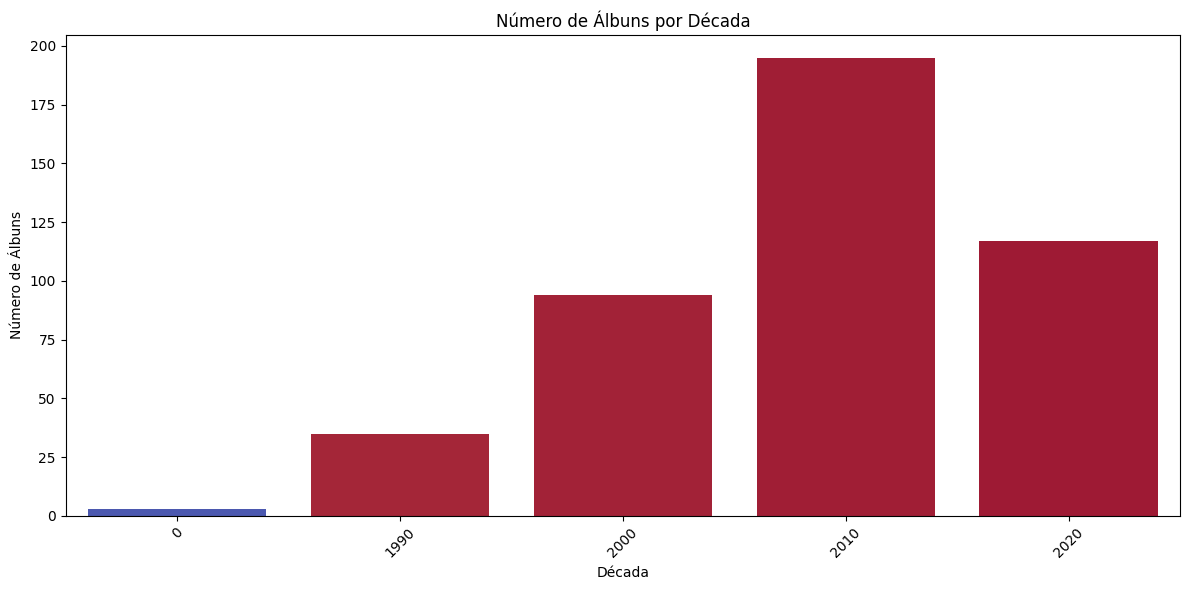

In [36]:
# média de albuns por artista
mean_albums_per_artist = df.groupby('artist')['album'].nunique().mean()
print("Média de álbuns por artista: {:.2f}".format(mean_albums_per_artist))

df['decade'] = (df['year'] // 10) * 10

# gráfico de albuns por década
albums_by_decade = df.groupby('decade')['album'].nunique().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    x=albums_by_decade['decade'],
    y=albums_by_decade['album'],
    hue=albums_by_decade['decade'],
    palette='coolwarm',
    legend=False
)
plt.title('Número de Álbuns por Década')
plt.xlabel('Década')
plt.ylabel('Número de Álbuns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('albuns_por_decada.png')
plt.show()

### Análise das gravadoras ✅

Gravadoras mais frequentes por década:
    decade            record_label  count
0     1990  Universal Music Brasil     25
6     2000          Sky Blue Music     40
22    2010           Radar Records     45
53    2020               Som Livre     13


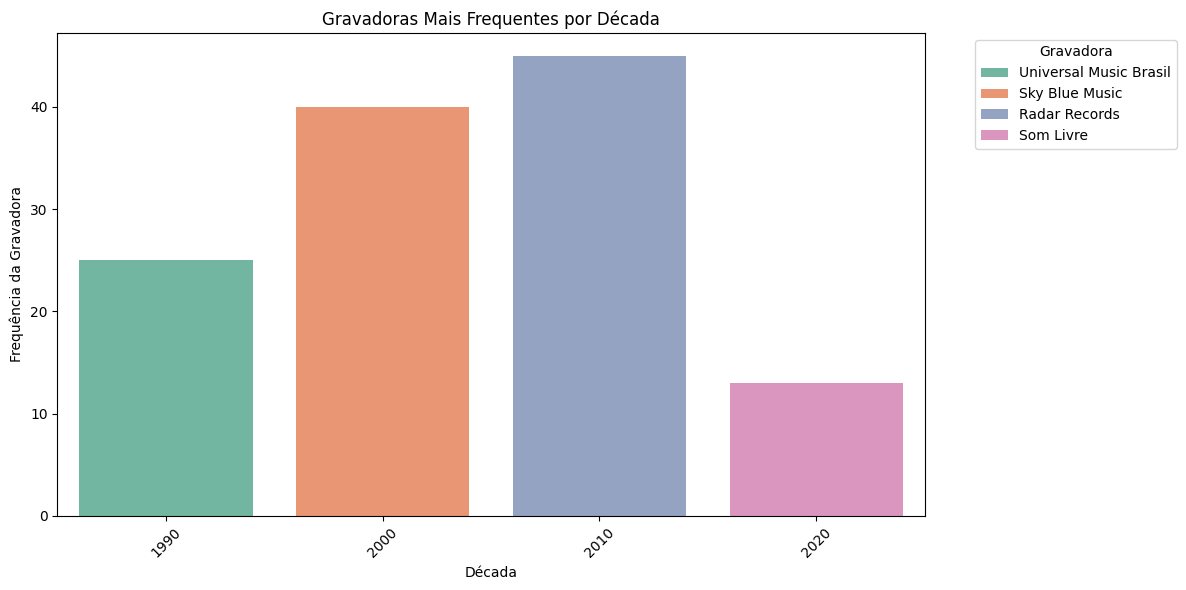

Gravadora que lançou mais álbuns distintos: Kamika-z


In [ ]:
df['decade'] = (df['year'] // 10) * 10

# gravadoras mais frequentes por década
record_label_counts = (
    df.groupby('decade')['record_label']
    .value_counts()
    .reset_index(name='count')
)
top_record_labels_by_decade = (
    record_label_counts
    .loc[record_label_counts.groupby('decade')['count'].idxmax()]
)
# print("Gravadoras mais frequentes por década:")
# print(top_record_labels_by_decade)

# Gráfico de barras das gravadoras mais frequentes por década
plt.figure(figsize=(12, 6))
sns.barplot(x=top_record_labels_by_decade['decade'], 
            y=top_record_labels_by_decade['count'], 
            hue=top_record_labels_by_decade['record_label'], 
            palette='Set2')
plt.title('Gravadoras Mais Frequentes por Década')
plt.xlabel('Década')
plt.ylabel('Frequência da Gravadora')
plt.xticks(rotation=45)
plt.legend(title='Gravadora', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('gravadoras_frequentes_por_decada.png')
plt.show()

# salvar a gravadora que lançou mais álbuns na base toda
top_record_label = (
    df.dropna(subset=['record_label', 'album'])  # remove linhas sem gravadora ou álbum
      .drop_duplicates(subset=['album', 'record_label'])  # garante que um álbum não seja contado várias vezes
      .groupby('record_label')['album']
      .nunique()
      .sort_values(ascending=False)
      .idxmax()
)
print("Gravadora que lançou mais álbuns distintos:", top_record_label)

### Análise das Letras ✅

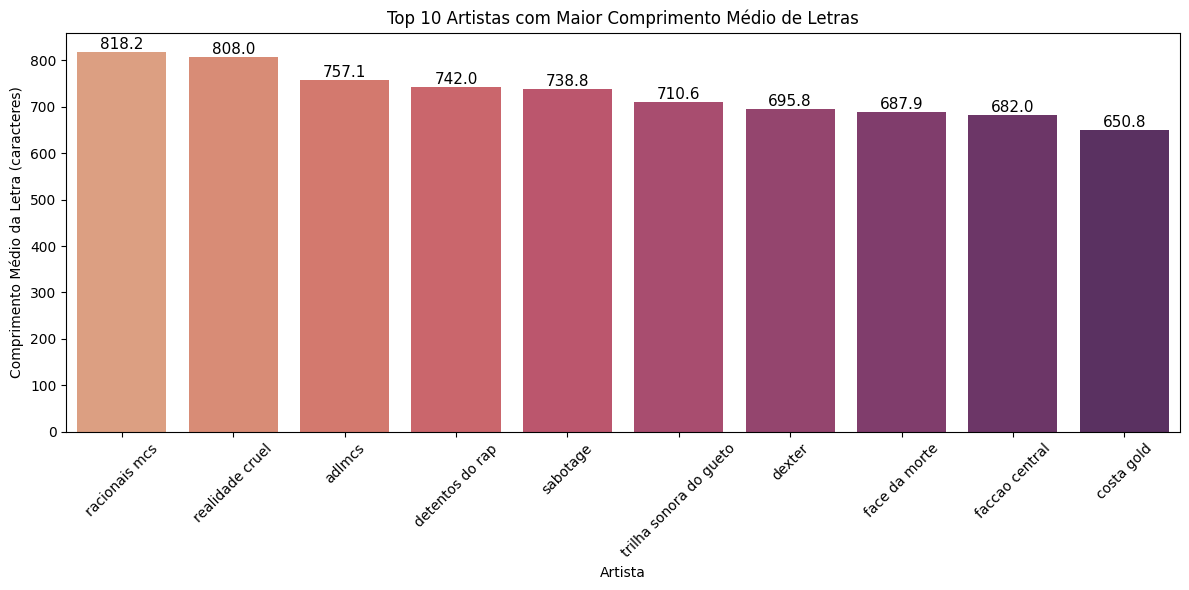

In [42]:
# Comprimento médio das letras por artista (em número de palavras)
mean_lyrics_length_by_artist = (
    df.dropna(subset=['lyrics'])
      .groupby('artist')['lyrics']
      .apply(lambda x: x.apply(lambda l: len(l) if isinstance(l, list) else len(str(l).split())).mean())
)
mean_lyrics_length_by_artist = mean_lyrics_length_by_artist.sort_values(ascending=False).head(10)

# Gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=mean_lyrics_length_by_artist.index,
    y=mean_lyrics_length_by_artist.values,
    hue=mean_lyrics_length_by_artist.index,
    palette='flare',
    legend=False
)
plt.title('Top 10 Artistas com Maior Comprimento Médio de Letras')
plt.xlabel('Artista')
plt.ylabel('Comprimento Médio da Letra (caracteres)')
plt.xticks(rotation=45)
# Adicionar médias no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=11)
plt.tight_layout()
plt.savefig('comprimento_medio_letras_por_artista.png')
plt.show()

### Análise por Regiões e Estados

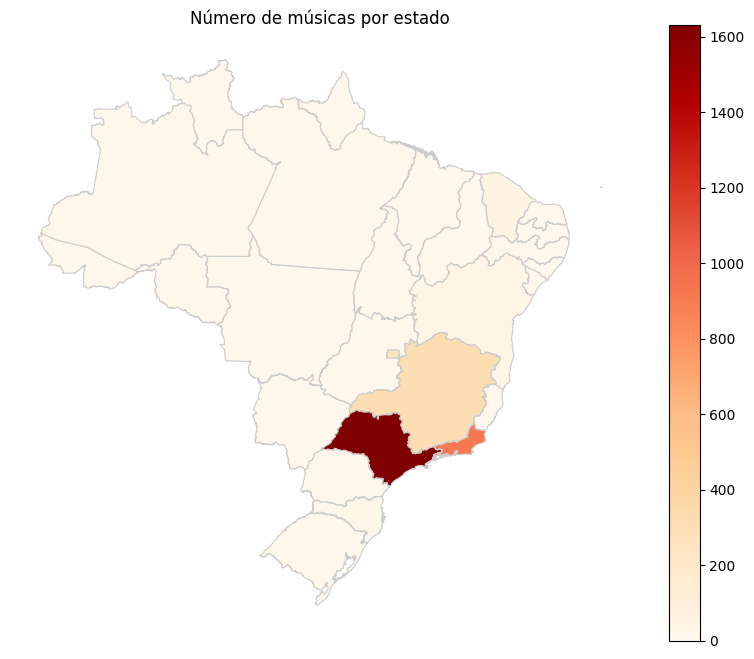

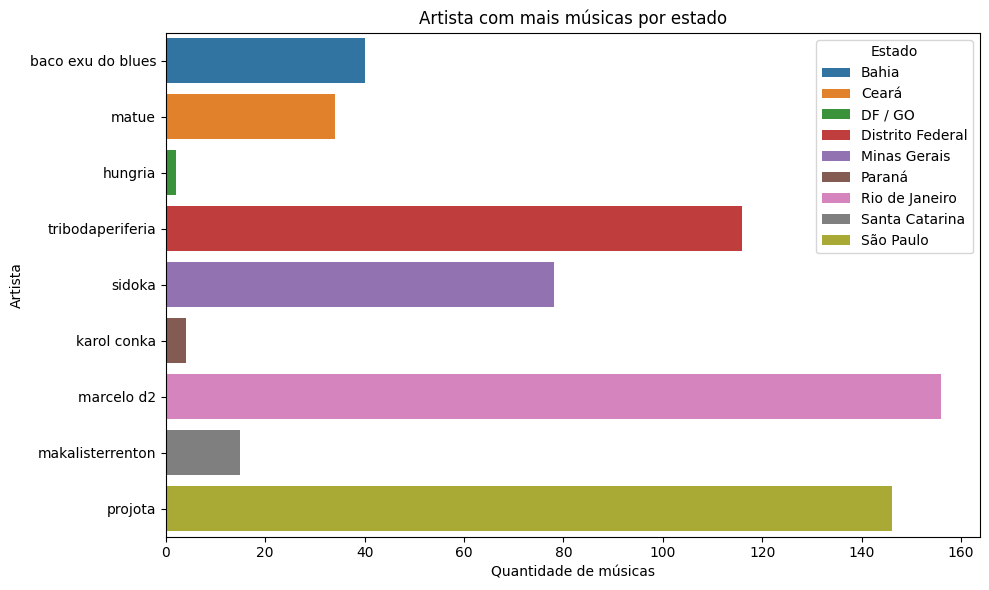

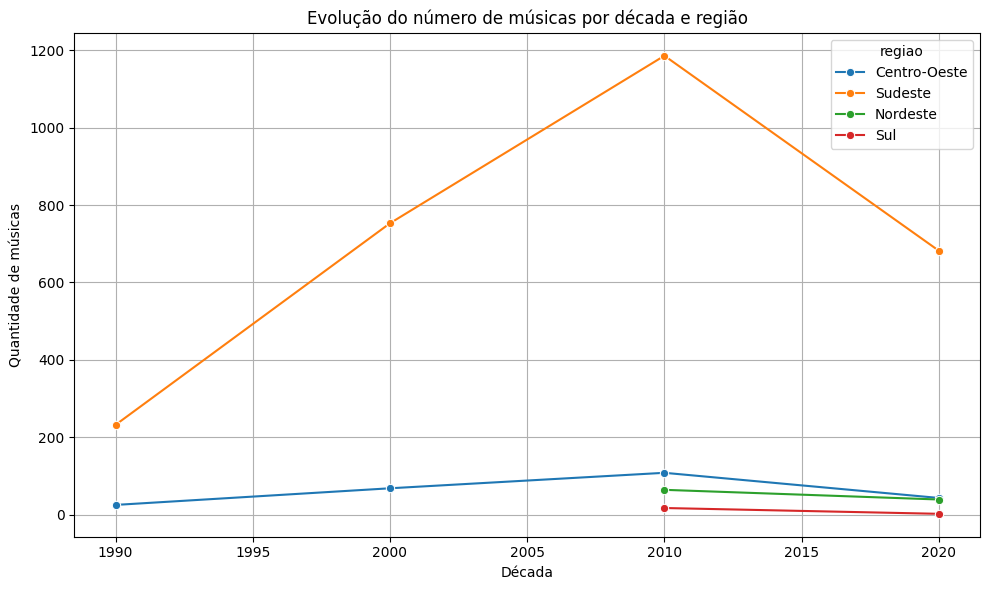

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from wordcloud import WordCloud
from collections import Counter

# Mapa do Brasil por número de músicas por estado
musicas_por_estado = df['estado'].value_counts().reset_index()
musicas_por_estado.columns = ['estado', 'qtd_musicas']

# Leitura do shape do Brasil (com geopandas)
# Removido: br = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Não é necessário carregar esse shape, pois o shape correto do Brasil já é carregado abaixo:
# br_estados = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')
br_estados = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')
br_estados = br_estados[['name', 'geometry']].rename(columns={'name': 'estado'})

# Ajuste para combinar nomes
musicas_por_estado['estado'] = musicas_por_estado['estado'].str.title()
br_estados['estado'] = br_estados['estado'].str.title()

# Merge dos dados
geo_df = br_estados.merge(musicas_por_estado, on='estado', how='left')
geo_df['qtd_musicas'] = geo_df['qtd_musicas'].fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
geo_df.plot(column='qtd_musicas', cmap='OrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)
plt.title('Número de músicas por estado')
plt.axis('off')
plt.savefig('musicas_por_estado.png')
plt.show()

# Artistas com mais músicas por estado
top_artistas_estado = df.groupby(['estado', 'artist']).size().reset_index(name='count')
top_artistas_estado = top_artistas_estado.sort_values(['estado', 'count'], ascending=[True, False])
top_5_por_estado = top_artistas_estado.groupby('estado').head(1)  # top 1 artista por estado

plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_por_estado, y='artist', x='count', hue='estado', dodge=False)
plt.title('Artista com mais músicas por estado')
plt.xlabel('Quantidade de músicas')
plt.ylabel('Artista')
plt.legend(title='Estado', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('top_artistas_por_estado.png')
plt.show()

# Evolução temporal por região (apenas décadas diferentes de zero)
musicas_por_regiao_tempo = musicas_por_regiao_tempo[musicas_por_regiao_tempo['decade'] != 0]
plt.figure(figsize=(10, 6))
sns.lineplot(data=musicas_por_regiao_tempo, x='decade', y='qtd', hue='regiao', marker='o')
plt.title('Evolução do número de músicas por década e região')
plt.xlabel('Década')
plt.ylabel('Quantidade de músicas')
plt.grid(True)
plt.tight_layout()
plt.savefig('evolucao_musicas_por_regiao.png')
plt.show()
